<a href="https://colab.research.google.com/github/bukshalishah/Smart-City-Lab/blob/master/Position_Salaries_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv("Position_Salaries.csv")

In [3]:
df.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [4]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [5]:
df.shape

(10, 3)

In [0]:
x = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [0]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1,1))

In [8]:
# kernal = rbf, linear, poly, sigmoid
regressor = SVR(kernel='poly', degree=3, coef0=1.2)
regressor.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=1.2, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predict = regressor.predict(x)
y_predict = sc_y.inverse_transform(y_predict)

In [10]:
y_predict

array([ 16641.08556618,  78484.69839352,  92442.38285436,  83779.62591472,
        77761.91454055,  99654.73569785, 174723.57635261, 328233.9234708 ,
       585451.26401841, 971641.08496142])

In [11]:
regressor.score(x,y)

0.9804139628500698

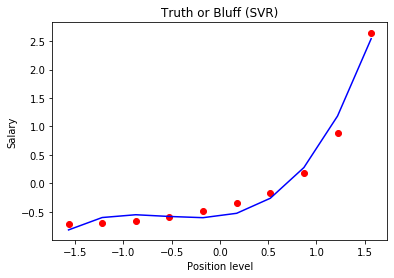

In [12]:
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [13]:
regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 1.2,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto_deprecated',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [14]:
regressor.intercept_

array([-0.58398999])